In [1]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [10]:
# 📥 Step 2: Load Dataset
df = pd.read_csv('IRIS.csv')  # Make sure this matches your filename
print("✅ Dataset Loaded Successfully")
df.head()


✅ Dataset Loaded Successfully


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# Step 3: Exploratory Data Analysis (EDA)

# Shape and sample of the dataset
print("Shape of dataset:", df.shape)
print("\nDataset sample:")
print(df.head())


Shape of dataset: (150, 5)

Dataset sample:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [12]:
# Null values
print("\nChecking for null values:")
print(df.isnull().sum())

# Duplicate values
print("\nChecking for duplicate rows:")
print(df.duplicated().sum())



Checking for null values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Checking for duplicate rows:
3


In [13]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())



Summary statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [14]:
print("Column names in your dataset:")
print(df.columns)


Column names in your dataset:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [15]:
# Class distribution
print("\nClass distribution:")
print(df['species'].value_counts())



Class distribution:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


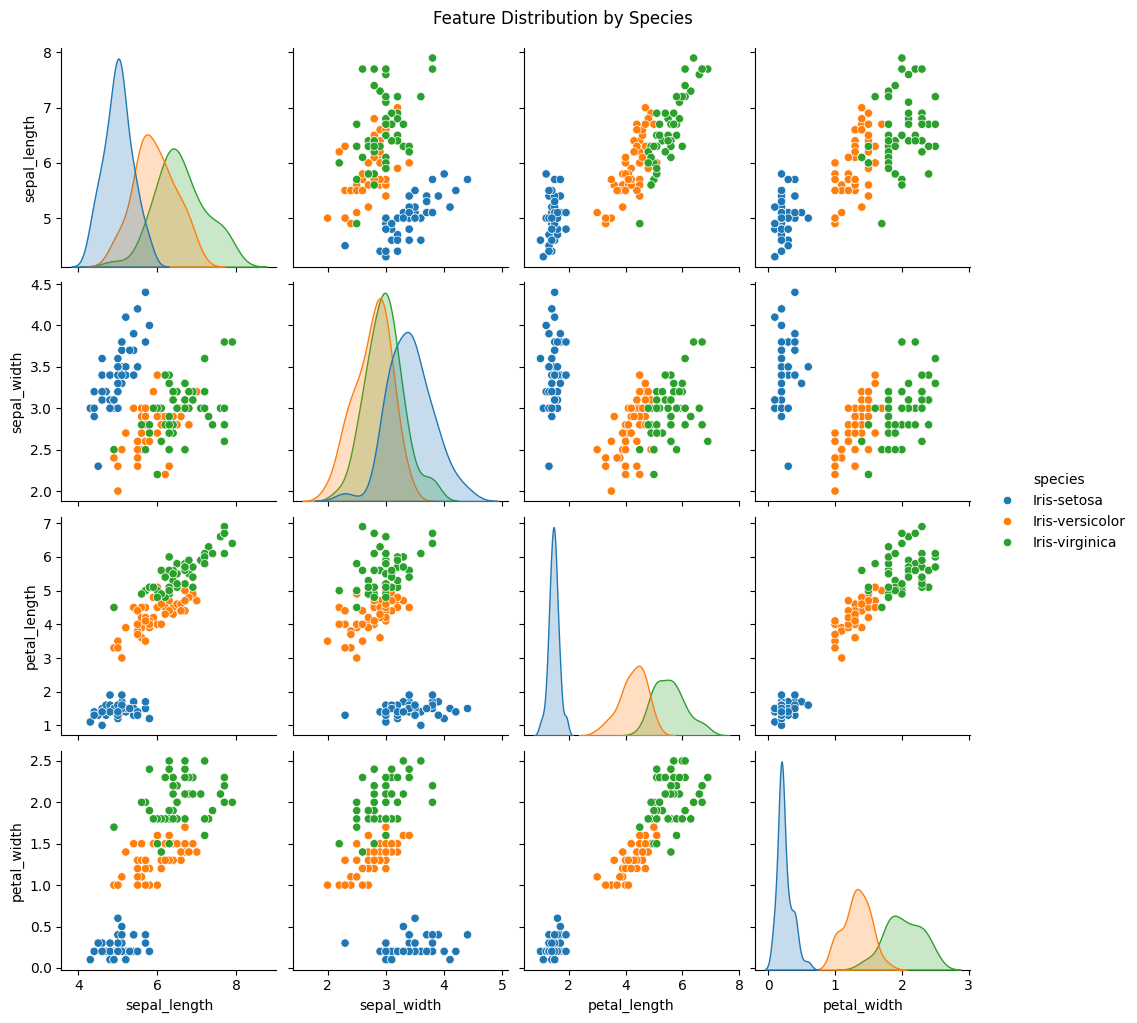

In [16]:
# Visualizing all features against each other
sns.pairplot(df, hue='species')
plt.suptitle("Feature Distribution by Species", y=1.02)
plt.show()


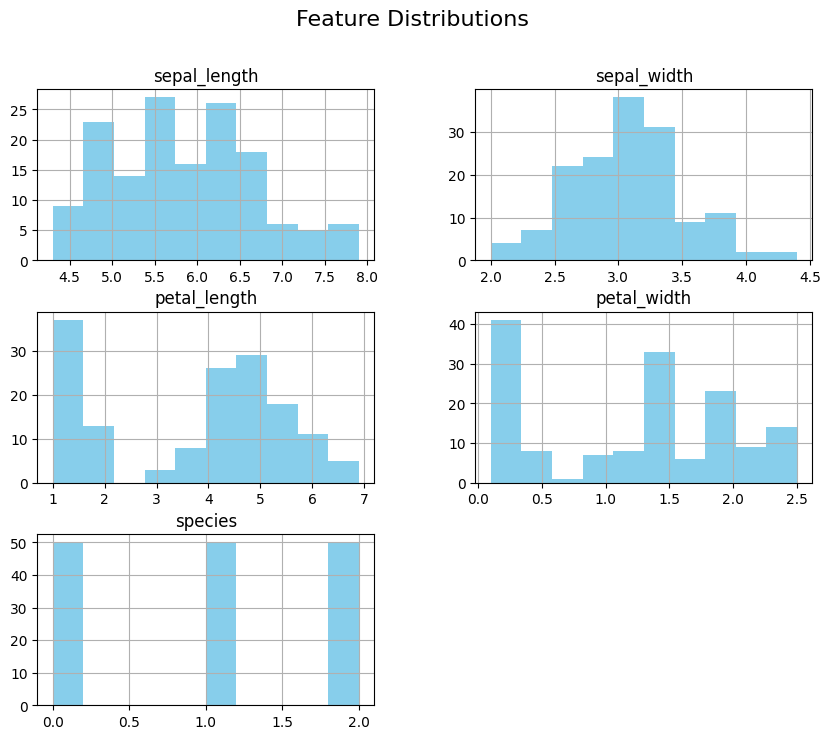

In [20]:
# Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

df.hist(figsize=(10, 8), color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


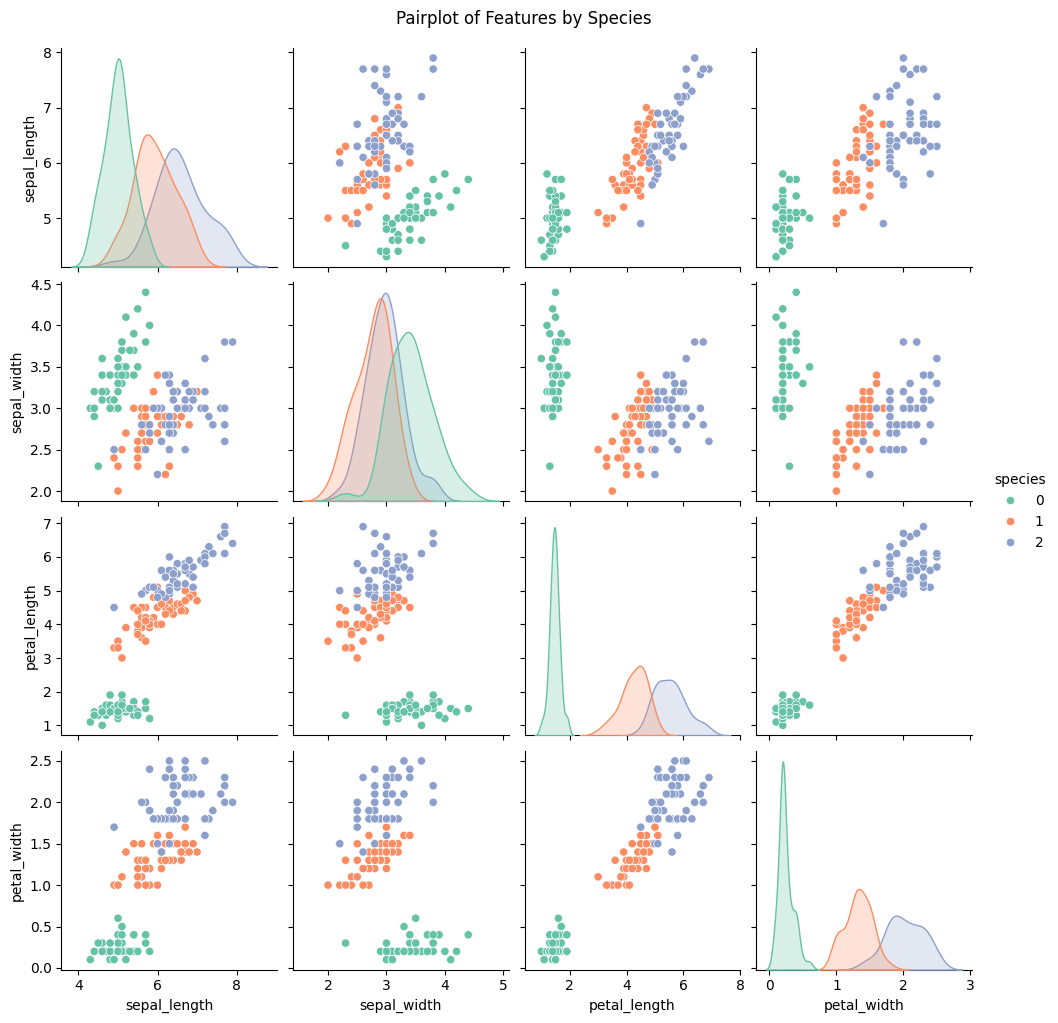

In [21]:
# Pairplots

sns.pairplot(df, hue='species', palette='Set2')
plt.suptitle("Pairplot of Features by Species", y=1.02)
plt.show()


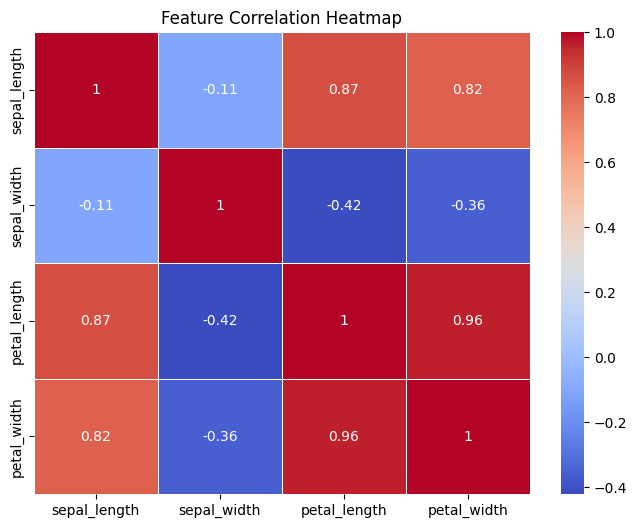

In [22]:
# Correlation Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [23]:
# Step 4: Data Preprocessing

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

print("Label encoding mapping:")
print(dict(zip(le.classes_, le.transform(le.classes_))))


Label encoding mapping:
{np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}


In [24]:
# Split Features and Target

X = df.drop('species', axis=1)
y = df['species']


In [25]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (120, 4)
Testing set size: (30, 4)


In [26]:
# Step 5 Model Building

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
# Make predictions
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)


In [28]:
# Step 6 Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression Evaluation
print("📌 Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, log_preds))

print("\n" + "="*50 + "\n")

# Random Forest Evaluation
print("📌 Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


📌 Logistic Regression Metrics:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


📌 Random Forest Classifier Metrics:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  

In [31]:
# 🧠 Step 7: Manual Prediction Using User Input
import warnings
warnings.filterwarnings('ignore')

print("\n🔍 Enter flower details to predict species ⤵")

sepal_length = float(input("Sepal Length (cm): "))
sepal_width = float(input("Sepal Width (cm): "))
petal_length = float(input("Petal Length (cm): "))
petal_width = float(input("Petal Width (cm): "))

# Create a NumPy array for input
input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# Choose model
model_choice = input("Choose model (lr / rf): ").strip().lower()

# Predict
if model_choice == 'lr':
    pred = log_model.predict(input_data)
elif model_choice == 'rf':
    pred = rf_model.predict(input_data)
else:
    print("Invalid model. Defaulted to Logistic Regression.")
    pred = log_model.predict(input_data)

# Decode the prediction (0, 1, 2 to actual species name)
species_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
species_name = species_map[pred[0]]

print(f"\n🌸 Predicted Species: {species_name}")



🔍 Enter flower details to predict species ⤵
Sepal Length (cm): 6.0
Sepal Width (cm): 2.2
Petal Length (cm): 4.0
Petal Width (cm): 1.0
Choose model (lr / rf): rf

🌸 Predicted Species: Versicolor
